Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
Convert the returned JSON object into a Python dictionary.
Calculate what the highest and lowest opening prices were for the stock in this period.
What was the largest change in any one day (based on High and Low price)?
What was the largest change between any two days (based on Closing Price)?
What was the average daily trading volume during this year?
(Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

In [1]:
import os 
from dotenv import load_dotenv
import requests
import datetime
import json
import matplotlib.pyplot as plt

load_dotenv()
API_KEYS = os.getenv('NASDAQ_API_KEY')


In [2]:
past = datetime.datetime.now() - datetime.timedelta(days=365*10)
past_time = past.strftime('%Y-%m-%d')
next_day = past + datetime.timedelta(days=1)

In [3]:
data = 'AFX_X'
dataset = 'FSE'

In [4]:
r=requests.get(f"https://data.nasdaq.com/api/v3/datasets/{dataset}/{data}.json?&start_date={past_time}&end_date={next_day}&api_key={API_KEYS}")

In [5]:
dict_obj = json.loads(r.text)

In [6]:
dict_obj

{'dataset': {'id': 10095370,
  'dataset_code': 'AFX_X',
  'database_code': 'FSE',
  'name': 'Carl Zeiss Meditec (AFX_X)',
  'description': 'Stock Prices for Carl Zeiss Meditec (2020-11-02) from the Frankfurt Stock Exchange.<br><br>Trading System: Xetra<br><br>ISIN: DE0005313704',
  'refreshed_at': '2020-12-01T14:48:09.907Z',
  'newest_available_date': '2020-12-01',
  'oldest_available_date': '2000-06-07',
  'column_names': ['Date',
   'Open',
   'High',
   'Low',
   'Close',
   'Change',
   'Traded Volume',
   'Turnover',
   'Last Price of the Day',
   'Daily Traded Units',
   'Daily Turnover'],
  'frequency': 'daily',
  'type': 'Time Series',
  'premium': False,
  'limit': None,
  'transform': None,
  'column_index': None,
  'start_date': '2014-07-02',
  'end_date': '2014-07-03',
  'data': [['2014-07-03',
    22.4,
    22.8,
    22.38,
    22.69,
    None,
    49106.0,
    1112606.0,
    None,
    None,
    None],
   ['2014-07-02',
    22.19,
    22.38,
    22.16,
    22.35,
    None,

### 1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).

In [7]:
r=requests.get(f"https://data.nasdaq.com/api/v3/datasets/{dataset}/{data}.json?&start_date=2017-01-01&end_date=2017-12-31&api_key={API_KEYS}")

### 2. Convert the returned JSON object into a Python dictionary

In [8]:
zeiss_2017 = json.loads(r.text)

In [9]:
def empty_count(size:int, data: list, columns:list):
    empty_columns_count = [0]*size
    for i in range(len(data)):
        for j in range(size):
            if data[i][j] == None:
                empty_columns_count[j]+=1
    empty_columns_count = list(zip(columns, empty_columns_count))
    return empty_columns_count


print(empty_count(11, zeiss_2017['dataset']['data'], zeiss_2017['dataset']['column_names']))

[('Date', 0), ('Open', 3), ('High', 0), ('Low', 0), ('Close', 0), ('Change', 254), ('Traded Volume', 0), ('Turnover', 0), ('Last Price of the Day', 255), ('Daily Traded Units', 255), ('Daily Turnover', 255)]


#### We can see that there are columns with no data or almost no data, so we can remove them. There are also three missing values in the 'Open' column, which we will address shortly.

In [10]:
# columns list will hold only column names 
columns = zeiss_2017['dataset']['column_names'][:5]+zeiss_2017['dataset']['column_names'][6:7]
columns

['Date', 'Open', 'High', 'Low', 'Close', 'Traded Volume']

In [11]:

data_dict_2017 = {}
for column in columns:
    data_dict_2017[column] = []
a = 0

for row in zeiss_2017['dataset']['data']:
    
    for cell in row[:5]+row[6:7]:
        try:
            data_dict_2017[columns[a%6]].append(float(cell))
        except:
            data_dict_2017[columns[a%6]].append(cell)
        a += 1


In [12]:


for key in data_dict_2017.keys():
    print(f"{key:<15}", end="")
a = 0
print('\n','-'*100)
while a<4:
    for key in data_dict_2017.keys():
        print(f'{data_dict_2017[key][a]:<15}', end="")
    print("")    
    a+=1 
    

    

Date           Open           High           Low            Close          Traded Volume  
 ----------------------------------------------------------------------------------------------------
2017-12-29     51.76          51.94          51.45          51.76          34640.0        
2017-12-28     51.65          51.82          51.43          51.6           40660.0        
2017-12-27     51.45          51.89          50.76          51.82          57452.0        
2017-12-22     51.05          51.5           50.92          51.32          71165.0        


In [13]:
# we get the closing data from previous day for missing opening cells
for i in range(len(data_dict_2017['Open'])-1,3,-1):
    if data_dict_2017['Open'][i] == None:
        data_dict_2017['Open'][i] = data_dict_2017['Close'][i-1]
            

In [14]:
#  I will also keep list version of data for some calculations
data_list = list(zip(*[data_dict_2017[key] for key in data_dict_2017.keys()]))
    

### 3. Calculate what the highest and lowest opening prices were for the stock in this period.

In [15]:
sorted_data_list =sorted(data_list, key= lambda x: x[1])

In [16]:
for row in sorted_data_list[:10]:
    print(row)

('2017-01-24', 34.0, 34.35, 33.85, 34.22, 48797.0)
('2017-01-23', 34.04, 34.12, 33.62, 34.06, 55333.0)
('2017-01-25', 34.42, 34.86, 34.03, 34.83, 56240.0)
('2017-01-20', 34.54, 34.59, 34.05, 34.17, 80246.0)
('2017-02-01', 34.75, 36.0, 34.75, 35.94, 85137.0)
('2017-01-10', 34.8, 34.98, 34.46, 34.91, 43976.0)
('2017-01-27', 34.83, 35.43, 34.81, 35.3, 69657.0)
('2017-01-16', 34.85, 35.24, 34.56, 35.07, 47879.0)
('2017-01-06', 34.91, 35.21, 34.91, 35.04, 27507.0)
('2017-01-11', 34.95, 36.0, 34.84, 35.42, 123530.0)


In [17]:
#3.Calculate what the highest and lowest opening prices were for the stock in this period.

print(f"Highest opening for Zeiss in year 2017 is ${sorted_data_list[-1][1]} on {sorted_data_list[-1][0]}")
print(f"Lowest opening for Zeiss in year 2017 is ${sorted_data_list[0][1]} on {sorted_data_list[0][0]}")

Highest opening for Zeiss in year 2017 is $53.11 on 2017-12-14
Lowest opening for Zeiss in year 2017 is $34.0 on 2017-01-24


### 4.What was the largest change in any one day (based on High and Low price)?

In [18]:
# 4.What was the largest change in any one day (based on High and Low price)?

sorted_data_list_1  = sorted(data_list, key= lambda x: x[columns.index('High')]-x[columns.index('Low')]) 

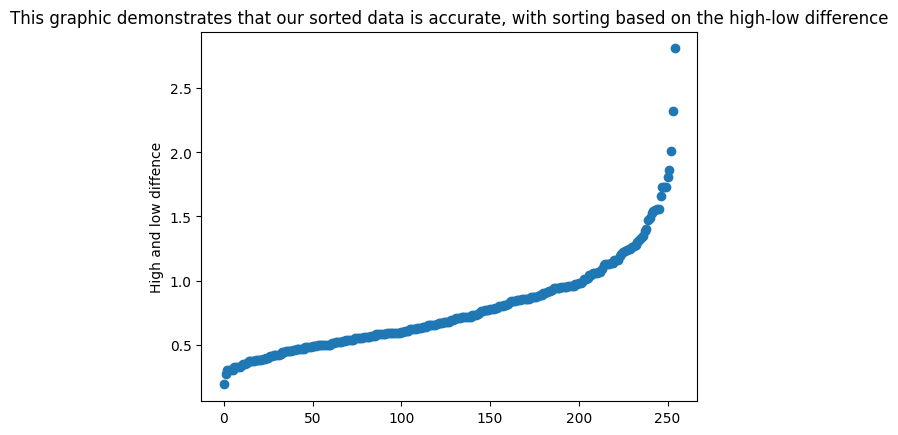

Largest change was 2.81 happend on 2017-05-11 with low: 43.25 and high: 46.06


In [19]:
plt.scatter(x=range(len(sorted_data_list_1)), y = [line[columns.index('High')]-line[columns.index('Low')] for line in sorted_data_list_1])
plt.ylabel('High and low diffence')
plt.title('This graphic demonstrates that our sorted data is accurate, with sorting based on the high-low difference')
plt.show()
print(f"Largest change was {(high:=sorted_data_list_1[-1][columns.index('High')]) - (low:=sorted_data_list_1[-1][columns.index('Low')]):.2f}",
      f"happend on {sorted_data_list_1[-1][0]}",
      f"with low: {low}",
      f"and high: {high}")

### 5. What was the largest change between any two days (based on Closing Price)?

In [20]:
largest_change  = 0
days = []

for i in range(len(data_list)-1):
    if ((change:=data_list[i][columns.index('Close')]  - data_list[i+1][columns.index('Close')])) > largest_change:
        largest_change = change
        days = [data_list[i][0], data_list[i+1][0]]
print(f"The largest change occurred between {days[0]} and {days[1]}, with a change of {largest_change:.2f}.")

The largest change occurred between 2017-05-11 and 2017-05-10, with a change of 1.72.


### 6. What was the average daily trading volume during this year?

In [21]:
print(f"Average daily trading volume during year 2017 is", 
      f"{sum(data_dict_2017['Traded Volume'])/len(data_dict_2017['Traded Volume']):.2f}.")

Average daily trading volume during year 2017 is 89124.34.


### 7.(Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

In [22]:
# 128th(127th index) element of the sorted list is median but lets create a fuction for that

def find_median(data :list[float]) -> float:
    data.sort()
    if len(data)%2:
        return data[(len(data)//2)]
    else: 
        return  (data[(len(data)//2)] + data[(len(data)//2)-1])/2

In [23]:
print(find_median(data_dict_2017['Traded Volume']))

76286.0
